In [1]:
import pandas as pd
import numpy as np
from shapely.wkt import loads
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks

In [2]:
cropland_fires = pd.read_csv('asset_cropland-fires_emissions.csv')

In [3]:
cropland_fires['modified_date'].value_counts()

Series([], Name: count, dtype: int64)

In [4]:
cropland_fires['activity_units'].value_counts()

Series([], Name: count, dtype: int64)

In [5]:
cropland_fires['capacity_units'].value_counts()

Series([], Name: count, dtype: int64)

In [6]:
cropland_fires['emissions_factor_units'].value_counts()

Series([], Name: count, dtype: int64)

In [7]:
cropland_fires['start_time'].value_counts()

start_time
2020-04-01 00:00:00    173720
2019-04-01 00:00:00    170235
2017-04-01 00:00:00    169725
2015-04-01 00:00:00    167160
2015-03-01 00:00:00    164695
                        ...  
2019-12-01 00:00:00     89735
2018-12-01 00:00:00     89445
2021-12-01 00:00:00     89345
2020-12-01 00:00:00     89075
2021-06-01 00:00:00     85625
Name: count, Length: 84, dtype: int64

In [8]:
cropland_fires['end_time'].value_counts()

end_time
2020-04-30 00:00:00    173720
2019-04-30 00:00:00    170235
2017-04-30 00:00:00    169725
2015-04-30 00:00:00    167160
2015-03-31 00:00:00    164695
                        ...  
2019-12-31 00:00:00     89735
2018-12-31 00:00:00     89445
2021-12-31 00:00:00     89345
2020-12-31 00:00:00     89075
2021-06-30 00:00:00     85625
Name: count, Length: 84, dtype: int64

In [9]:
cropland_fires['original_inventory_sector'].value_counts()

original_inventory_sector
cropland-fires    9999495
Name: count, dtype: int64

In [10]:
cropland_fires['gas'].value_counts()

gas
co2           1999899
ch4           1999899
n2o           1999899
co2e_100yr    1999899
co2e_20yr     1999899
Name: count, dtype: int64

In [11]:
cropland_fires.describe()

,asset_id,emissions_quantity,emissions_factor,emissions_factor_units,capacity,capacity_units,capacity_factor,activity,activity_units,modified_date
count,9.999495e+06,9.999495e+06,9.999495e+06,0.0,9.999495e+06,0.0,9999495.0,9.999495e+06,0.0,0.0
mean,1.834382e+09,5.915631e+02,2.892000e+02,NaN,4.833058e+01,NaN,2089.0,6.467261e+00,NaN,NaN
std,5.823519e+05,3.131903e+03,5.754041e+02,NaN,1.938640e+02,NaN,0.0,2.207716e+01,NaN,NaN
min,1.833312e+09,1.034208e-05,1.000000e-01,NaN,1.000000e-02,NaN,2089.0,5.555556e-02,NaN,NaN
25%,1.833911e+09,2.823388e-01,1.000000e-01,NaN,2.786667e+00,NaN,2089.0,1.000000e+00,NaN,NaN
50%,1.834406e+09,3.788001e+01,1.000000e-01,NaN,8.300000e+00,NaN,2089.0,2.000000e+00,NaN,NaN
75%,1.834916e+09,2.472492e+02,5.700000e+00,NaN,3.020500e+01,NaN,2089.0,5.000000e+00,NaN,NaN
max,1.835737e+09,8.879409e+05,1.440000e+03,NaN,3.645148e+04,NaN,2089.0,1.939000e+03,NaN,NaN


In [12]:
cropland_fires['emissions_quantity'].value_counts()

emissions_quantity
12.426836       1363
18.513242       1340
0.086873        1331
0.001034        1316
22.810905       1314
                ... 
1422.078742        1
1755.834806        1
8.557906           1
0.101880           1
10610.279781       1
Name: count, Length: 648337, dtype: int64

In [13]:
cropland_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999495 entries, 0 to 9999494
Data columns (total 20 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   asset_id                   int64  
 1   iso3_country               object 
 2   original_inventory_sector  object 
 3   start_time                 object 
 4   end_time                   object 
 5   temporal_granularity       object 
 6   gas                        object 
 7   emissions_quantity         float64
 8   emissions_factor           float64
 9   emissions_factor_units     float64
 10  capacity                   float64
 11  capacity_units             float64
 12  capacity_factor            int64  
 13  activity                   float64
 14  activity_units             float64
 15  created_date               object 
 16  modified_date              float64
 17  asset_name                 object 
 18  asset_type                 object 
 19  st_astext                  object 
dtypes:

In [14]:
cropland_fires.drop(columns="emissions_factor_units",inplace=True)

In [15]:
cropland_fires.drop(columns="capacity_units",inplace=True)

In [16]:
cropland_fires.drop(columns="activity_units",inplace=True)

In [17]:
cropland_fires.drop(columns="modified_date",inplace=True)

In [18]:
cropland_fires

,asset_id,iso3_country,original_inventory_sector,start_time,end_time,temporal_granularity,gas,emissions_quantity,emissions_factor,capacity,capacity_factor,activity,created_date,asset_name,asset_type,st_astext
0,1833543950,USA,cropland-fires,2015-10-01 00:00:00,2015-10-31 00:00:00,month,co2,1267.877783,1440.0,74.48,2089,10.0,2022-10-31 00:00:00,United States_Arkansas_,Cropland,"POLYGON((-91.625 35.625,-91.625 35.875,-91.375..."
1,1833543950,USA,cropland-fires,2015-10-01 00:00:00,2015-10-31 00:00:00,month,ch4,6.470336,5.7,74.48,2089,10.0,2022-10-31 00:00:00,United States_Arkansas_,Cropland,"POLYGON((-91.625 35.625,-91.625 35.875,-91.375..."
2,1833543950,USA,cropland-fires,2015-10-01 00:00:00,2015-10-31 00:00:00,month,n2o,0.077028,0.1,74.48,2089,10.0,2022-10-31 00:00:00,United States_Arkansas_,Cropland,"POLYGON((-91.625 35.625,-91.625 35.875,-91.375..."
3,1833543950,USA,cropland-fires,2015-10-01 00:00:00,2015-10-31 00:00:00,month,co2e_100yr,1469.428755,0.1,74.48,2089,10.0,2022-10-31 00:00:00,United States_Arkansas_,Cropland,"POLYGON((-91.625 35.625,-91.625 35.875,-91.375..."
4,1833543950,USA,cropland-fires,2015-10-01 00:00:00,2015-10-31 00:00:00,month,co2e_20yr,1814.297675,0.1,74.48,2089,10.0,2022-10-31 00:00:00,United States_Arkansas_,Cropland,"POLYGON((-91.625 35.625,-91.625 35.875,-91.375..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999490,1835385426,AGO,cropland-fires,2021-05-01 00:00:00,2021-05-31 00:00:00,month,co2,137.376124,1440.0,8.07,2089,1.0,2022-10-31 00:00:00,Angola_Lunda Sul_,Cropland,"POLYGON((21.875 -10.625,21.875 -10.375,22.125 ..."
9999491,1835385426,AGO,cropland-fires,2021-05-01 00:00:00,2021-05-31 00:00:00,month,ch4,0.701069,5.7,8.07,2089,1.0,2022-10-31 00:00:00,Angola_Lunda Sul_,Cropland,"POLYGON((21.875 -10.625,21.875 -10.375,22.125 ..."
9999492,1835385426,AGO,cropland-fires,2021-05-01 00:00:00,2021-05-31 00:00:00,month,n2o,0.008346,0.1,8.07,2089,1.0,2022-10-31 00:00:00,Angola_Lunda Sul_,Cropland,"POLYGON((21.875 -10.625,21.875 -10.375,22.125 ..."
9999493,1835385426,AGO,cropland-fires,2021-05-01 00:00:00,2021-05-31 00:00:00,month,co2e_100yr,159.214421,0.1,8.07,2089,1.0,2022-10-31 00:00:00,Angola_Lunda Sul_,Cropland,"POLYGON((21.875 -10.625,21.875 -10.375,22.125 ..."


In [19]:
cropland_fires['country'] = cropland_fires['asset_name'].str.partition("_")[0]
cropland_fires['state'] = cropland_fires['asset_name'].str.partition("_")[2].str.replace("_","")

In [20]:
cropland_fires['country'].value_counts()

country
China                882050
India                762635
Russia               602795
Brazil               533010
United States        517615
                      ...  
Equatorial Guinea        20
Solomon Islands          20
Gibraltar                15
New Caledonia            10
Andorra                   5
Name: count, Length: 178, dtype: int64

In [21]:
cropland_fires['state'].value_counts()

state
Punjab             101700
Maharashtra         95280
Uttar Pradesh       88515
Heilongjiang        84360
Madhya Pradesh      76980
                    ...  
Canóvanas               5
Maekel                  5
Møre og Romsdal         5
Cayenne                 5
Mayo                    5
Name: count, Length: 2921, dtype: int64

In [22]:
cropland_fires['state'] = cropland_fires['state'] + ', ' + cropland_fires['country']


In [23]:
cropland_fires.drop(columns="temporal_granularity",inplace=True)

In [24]:
cropland_fires.drop(columns="original_inventory_sector",inplace=True)

In [25]:
cropland_fires.drop(columns="asset_type",inplace=True)

In [26]:
cropland_fires.drop(columns="capacity_factor",inplace=True)

In [27]:
cropland_fires.drop(columns="created_date",inplace=True)

In [28]:
cropland_fires = pd.concat([cropland_fires, pd.get_dummies(cropland_fires['gas'],prefix='gas')], axis=1)

In [29]:
cropland_fires['month'] = pd.DatetimeIndex(cropland_fires['start_time']).month
cropland_fires['year'] = pd.DatetimeIndex(cropland_fires['start_time']).year

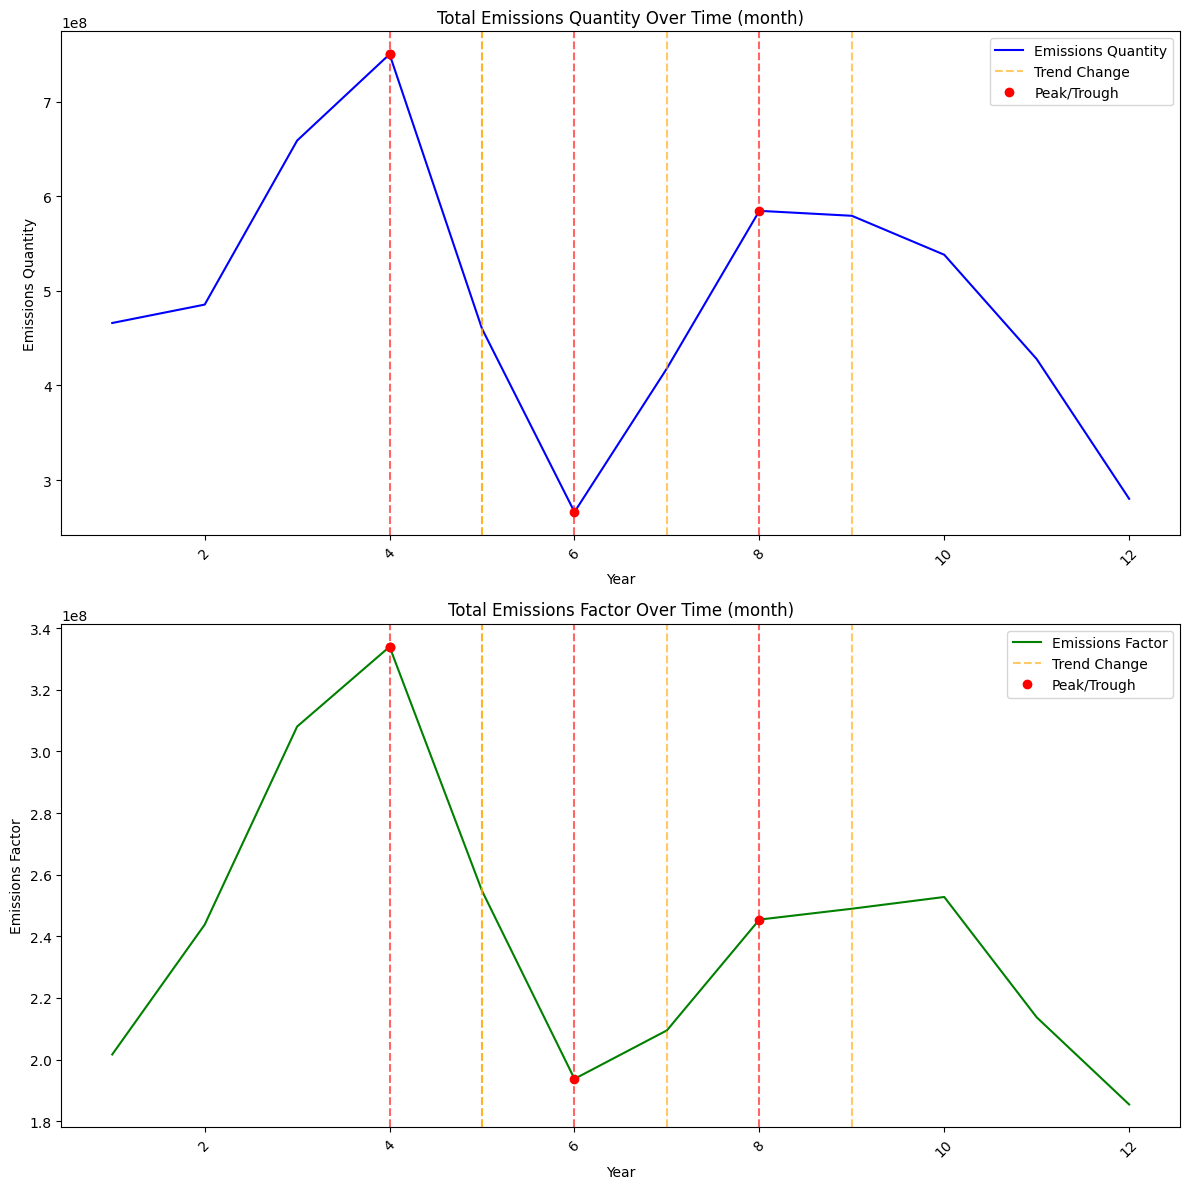

In [31]:
#Plot 1

def plot_emissions_vs_time_series_month() -> None:
    emissions_over_month = cropland_fires.groupby('month')['emissions_quantity'].sum().reset_index()
    emissions_factor_over_month = cropland_fires.groupby('month')['emissions_factor'].sum().reset_index()

    trend_change_indices = []
    for i in range(2, len(emissions_over_month)):
        diff = emissions_over_month['emissions_quantity'][i] - emissions_over_month['emissions_quantity'][i - 1]
        prev_diff = emissions_over_month['emissions_quantity'][i - 1] - emissions_over_month['emissions_quantity'][i - 2]
        if (diff > 0 and prev_diff <= 0) or (diff < 0 and prev_diff >= 0):
            trend_change_indices.append(i)

    emissions_quantity = emissions_over_month['emissions_quantity'].values
    peaks, _ = find_peaks(emissions_quantity)
    troughs, _ = find_peaks(-emissions_quantity)
    peak_trough_indices = sorted(list(peaks) + list(troughs))

    plt.figure(figsize=(12, 12))

    plt.subplot(2, 1, 1)
    plt.plot(emissions_over_month['month'], emissions_quantity, label='Emissions Quantity', color='blue')
    plt.title('Total Emissions Quantity Over Time (month)')
    plt.xlabel('Year')
    plt.ylabel('Emissions Quantity')
    plt.xticks(rotation=45)

    if trend_change_indices:
        plt.axvline(emissions_over_month['month'][trend_change_indices[0]], color='orange', linestyle='--', alpha=0.6, label="Trend Change")
    if peak_trough_indices:
        plt.plot(emissions_over_month['month'][peak_trough_indices[0]], emissions_quantity[peak_trough_indices[0]], 'ro', label="Peak/Trough")

    for idx in trend_change_indices:
        plt.axvline(emissions_over_month['month'][idx], color='orange', linestyle='--', alpha=0.6)
    for idx in peak_trough_indices:
        plt.plot(emissions_over_month['month'][idx], emissions_quantity[idx], 'ro')
        plt.axvline(emissions_over_month['month'][idx], color='red', linestyle='--', alpha=0.6)

    plt.legend()

    plt.subplot(2, 1, 2)
    emissions_factor = emissions_factor_over_month['emissions_factor'].values
    plt.plot(emissions_factor_over_month['month'], emissions_factor, label='Emissions Factor', color='green')
    plt.title('Total Emissions Factor Over Time (month)')
    plt.xlabel('Year')
    plt.ylabel('Emissions Factor')
    plt.xticks(rotation=45)

    if trend_change_indices:
        plt.axvline(emissions_factor_over_month['month'][trend_change_indices[0]], color='orange', linestyle='--', alpha=0.6, label="Trend Change")
    if peak_trough_indices:
        plt.plot(emissions_factor_over_month['month'][peak_trough_indices[0]], emissions_factor[peak_trough_indices[0]], 'ro', label="Peak/Trough")

    for idx in trend_change_indices:
        plt.axvline(emissions_factor_over_month['month'][idx], color='orange', linestyle='--', alpha=0.6)
    for idx in peak_trough_indices:
        plt.plot(emissions_factor_over_month['month'][idx], emissions_factor[idx], 'ro')
        plt.axvline(emissions_factor_over_month['month'][idx], color='red', linestyle='--', alpha=0.6)

    plt.legend()

    plt.tight_layout()
    plt.show()

plot_emissions_vs_time_series_month()


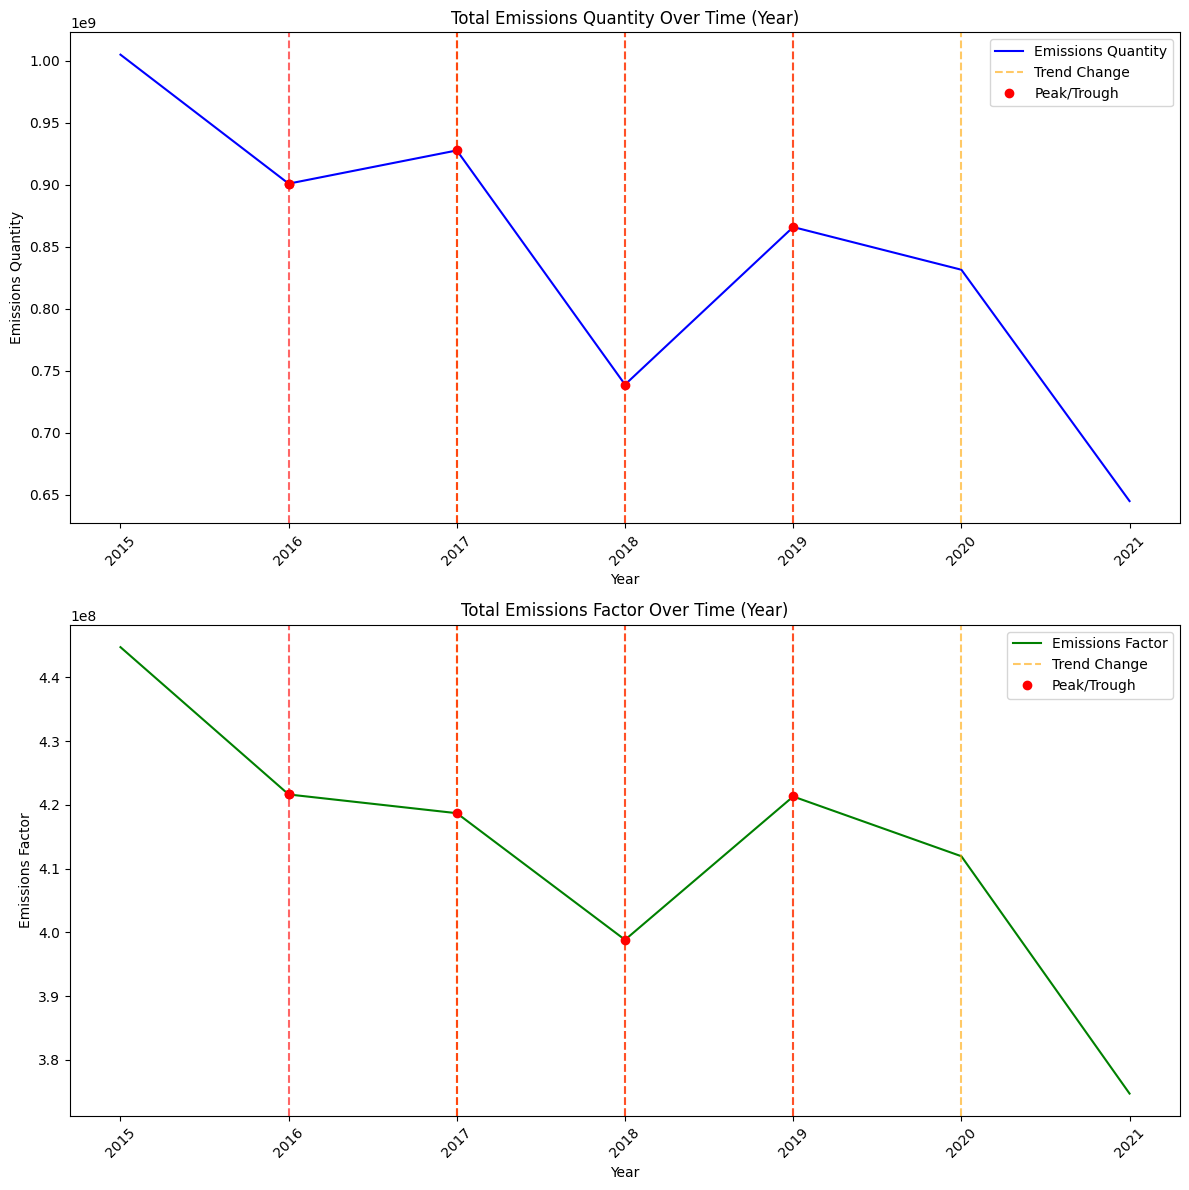

In [32]:
#Plot 2

def plot_emissions_vs_time_series_year():
    # Aggregate emissions data by year
    emissions_over_year = cropland_fires.groupby('year')['emissions_quantity'].sum().reset_index()
    emissions_factor_over_year = cropland_fires.groupby('year')['emissions_factor'].sum().reset_index()

    # Detect trend changes in emissions quantity
    trend_change_indices = []
    for i in range(2, len(emissions_over_year)):
        # Calculate differences to detect trend changes
        diff = emissions_over_year['emissions_quantity'][i] - emissions_over_year['emissions_quantity'][i - 1]
        prev_diff = emissions_over_year['emissions_quantity'][i - 1] - emissions_over_year['emissions_quantity'][i - 2]
        if (diff > 0 and prev_diff <= 0) or (diff < 0 and prev_diff >= 0):
            trend_change_indices.append(i)

    # Find peaks and troughs for emissions quantity
    emissions_quantity = emissions_over_year['emissions_quantity'].values
    peaks, _ = find_peaks(emissions_quantity)
    troughs, _ = find_peaks(-emissions_quantity)
    peak_trough_indices = sorted(list(peaks) + list(troughs))

    # Set up the figure and subplots
    plt.figure(figsize=(12, 12))

    # First subplot for Emissions Quantity by Year
    plt.subplot(2, 1, 1)
    plt.plot(emissions_over_year['year'], emissions_quantity, label='Emissions Quantity', color='blue')
    plt.title('Total Emissions Quantity Over Time (Year)')
    plt.xlabel('Year')
    plt.ylabel('Emissions Quantity')
    plt.xticks(rotation=45)

    # Add labels for trend changes and peaks/troughs
    if trend_change_indices:
        plt.axvline(emissions_over_year['year'][trend_change_indices[0]], color='orange', linestyle='--', alpha=0.6, label="Trend Change")
    if peak_trough_indices:
        plt.plot(emissions_over_year['year'][peak_trough_indices[0]], emissions_quantity[peak_trough_indices[0]], 'ro', label="Peak/Trough")

    # Mark trend changes, peaks, and troughs in the first subplot
    for idx in trend_change_indices:
        plt.axvline(emissions_over_year['year'][idx], color='orange', linestyle='--', alpha=0.6)
    for idx in peak_trough_indices:
        plt.plot(emissions_over_year['year'][idx], emissions_quantity[idx], 'ro')
        plt.axvline(emissions_over_year['year'][idx], color='red', linestyle='--', alpha=0.6)

    plt.legend()

    # Second subplot for Emissions Factor by Year
    plt.subplot(2, 1, 2)
    emissions_factor = emissions_factor_over_year['emissions_factor'].values
    plt.plot(emissions_factor_over_year['year'], emissions_factor, label='Emissions Factor', color='green')
    plt.title('Total Emissions Factor Over Time (Year)')
    plt.xlabel('Year')
    plt.ylabel('Emissions Factor')
    plt.xticks(rotation=45)

    # Draw labels for trend changes and peaks/troughs
    if trend_change_indices:
        plt.axvline(emissions_factor_over_year['year'][trend_change_indices[0]], color='orange', linestyle='--', alpha=0.6, label="Trend Change")
    if peak_trough_indices:
        plt.plot(emissions_factor_over_year['year'][peak_trough_indices[0]], emissions_factor[peak_trough_indices[0]], 'ro', label="Peak/Trough")

    # Draw trend change lines and peak/trough markers on the second subplot
    for idx in trend_change_indices:
        plt.axvline(emissions_factor_over_year['year'][idx], color='orange', linestyle='--', alpha=0.6)
    for idx in peak_trough_indices:
        plt.plot(emissions_factor_over_year['year'][idx], emissions_factor[idx], 'ro')
        plt.axvline(emissions_factor_over_year['year'][idx], color='red', linestyle='--', alpha=0.6)

    plt.legend()

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Call the combined function
plot_emissions_vs_time_series_year()

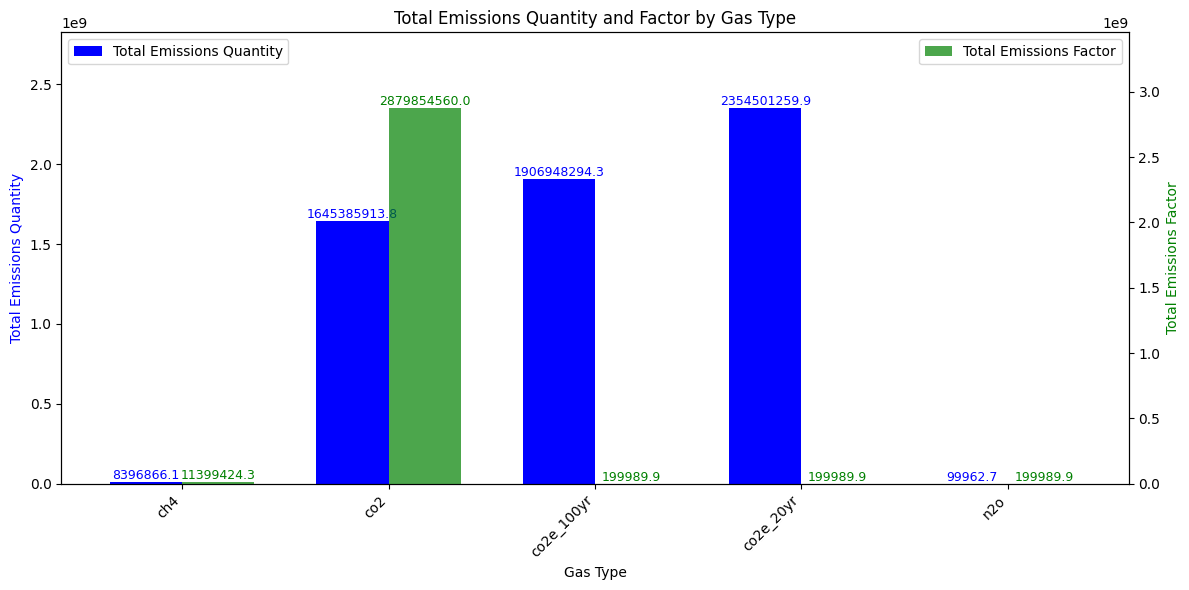

In [33]:
# plot 3

def plot_emissions_vs_gas():
    # Aggregate emissions quantity and factor by gas type
    emissions_quantity_agg = cropland_fires.groupby('gas')['emissions_quantity'].sum().reset_index()
    emissions_factor_agg = cropland_fires.groupby('gas')['emissions_factor'].sum().reset_index()

    # Set up the figure
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Bar width
    bar_width = 0.35
    x = np.arange(len(emissions_quantity_agg['gas']))  # the label locations

    # Create bar plots for emissions quantity
    bars1 = ax1.bar(x - bar_width/2, emissions_quantity_agg['emissions_quantity'], 
                     width=bar_width, label='Total Emissions Quantity', color='blue')

    # Create a second y-axis for emissions factor
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    # Create bar plots for emissions factor
    bars2 = ax2.bar(x + bar_width/2, emissions_factor_agg['emissions_factor'], 
                     width=bar_width, label='Total Emissions Factor', color='green', alpha=0.7)

    # Adjust the y-axis limits for better visibility
    ax1.set_ylim(0, max(emissions_quantity_agg['emissions_quantity']) * 1.2)
    ax2.set_ylim(0, max(emissions_factor_agg['emissions_factor']) * 1.2)

    # Add labels, title, and legends
    ax1.set_title('Total Emissions Quantity and Factor by Gas Type')
    ax1.set_xlabel('Gas Type')
    ax1.set_ylabel('Total Emissions Quantity', color='blue')
    ax2.set_ylabel('Total Emissions Factor', color='green')

    ax1.set_xticks(x)
    ax1.set_xticklabels(emissions_quantity_agg['gas'], rotation=45, ha='right')

    # Add value annotations for emissions quantity (only for significant bars)
    for bar in bars1:
        yval = bar.get_height()
        # Annotate only if the value is above a certain threshold
        if yval > 10:  # Adjust this threshold as needed
            ax1.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), 
                      ha='center', va='bottom', fontsize=9, color='blue')

    # Add value annotations for emissions factor (only for significant bars)
    for bar in bars2:
        yval = bar.get_height()
        if yval > 10:  # Adjust this threshold as needed
            ax2.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), 
                      ha='center', va='bottom', fontsize=9, color='green')

    # Legends for each y-axis
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Call the combined function
plot_emissions_vs_gas()

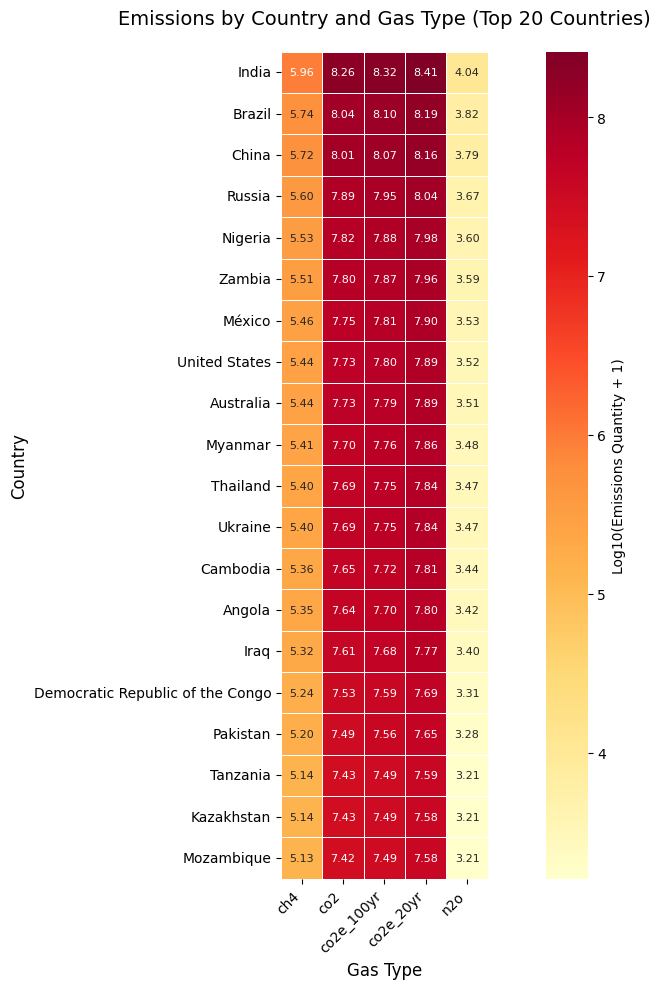

In [34]:
# plot 4
def plot_emissions_heatmap_countries(data):
    heatmap_data = data.pivot_table(
        index='country', 
        columns='gas', 
        values='emissions_quantity', 
        aggfunc='sum'
    )
    
    heatmap_data['total'] = heatmap_data.sum(axis=1)
    heatmap_data = heatmap_data.sort_values('total', ascending=False)
    heatmap_data = heatmap_data.drop('total', axis=1)
    
    heatmap_data = heatmap_data.head(20)
    
    heatmap_data_log = np.log10(heatmap_data + 1)
    
    plt.figure(figsize=(12, 10))
    
    sns.heatmap(heatmap_data_log,
                cmap='YlOrRd',
                linewidths=0.5,
                linecolor='white',
                square=True,
                cbar_kws={'label': 'Log10(Emissions Quantity + 1)'},
                fmt='.2f',
                annot=True,
                annot_kws={'size': 8})
    
    plt.title('Emissions by Country and Gas Type (Top 20 Countries)', pad=20, fontsize=14)
    plt.xlabel('Gas Type', fontsize=12)
    plt.ylabel('Country', fontsize=12)
    
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    
    plt.show()
    

plot_emissions_heatmap_countries(cropland_fires)

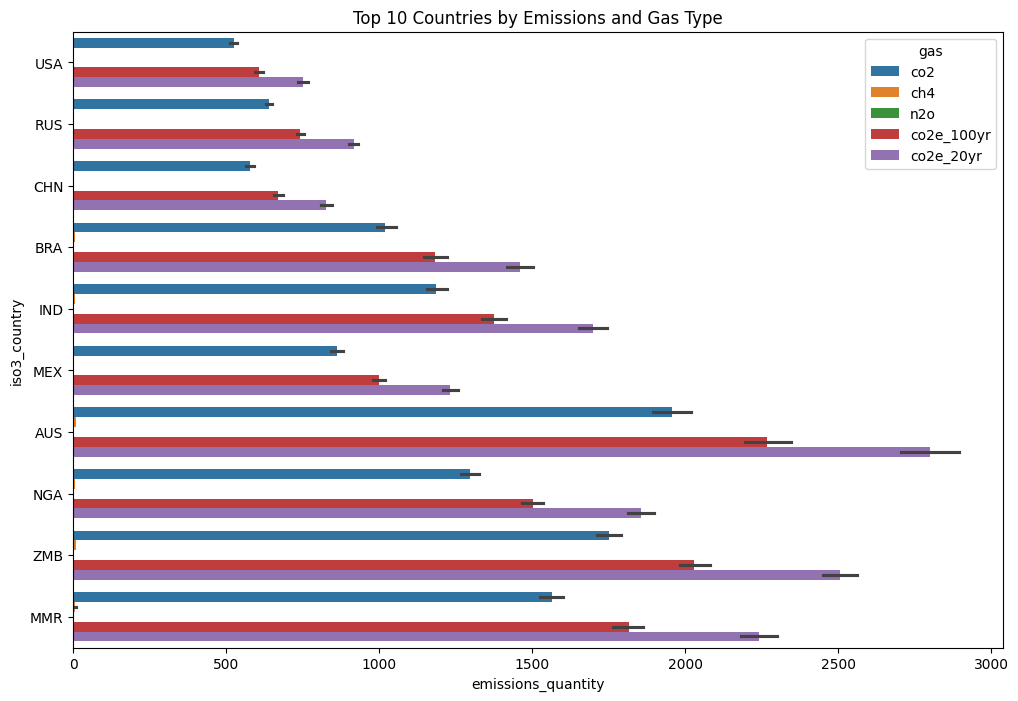

In [35]:
# plot 5
def plot_emissions_by_country_gas():
    # Adjust column name here
    top_countries = cropland_fires.groupby('iso3_country')['emissions_quantity'].sum().nlargest(10).index
    
    # Filter data for top countries
    df_top = cropland_fires[cropland_fires['iso3_country'].isin(top_countries)]
    
    # Plotting emissions by country and gas type
    plt.figure(figsize=(12, 8))
    sns.barplot(x='emissions_quantity', y='iso3_country', hue='gas', data=df_top)
    
    # Add title and show the plot
    plt.title('Top 10 Countries by Emissions and Gas Type')
    plt.show()
plot_emissions_by_country_gas()

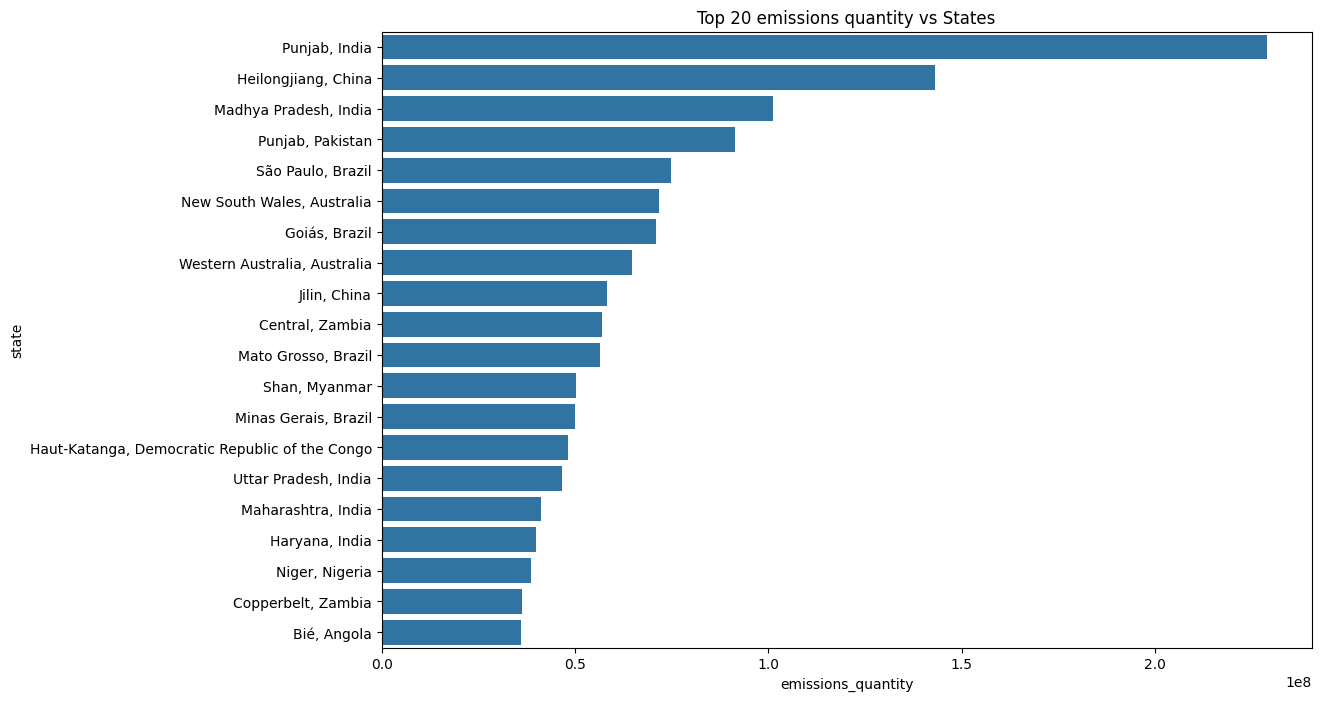

In [36]:
# plot 7
def plot_top_emitting_quantity_assets():
    top_assets = cropland_fires.groupby('state')['emissions_quantity'].sum().nlargest(20).reset_index()
    plt.figure(figsize=(12, 8))
    sns.barplot(x='emissions_quantity', y='state', data=top_assets)
    plt.title('Top 20 emissions quantity vs States')
    plt.show()
    plt.figure(figsize=(12, 8))
    sns.barplot(x='emissions_factor', y='state', data=top_assets, color='green')
    plt.title('Top 20 emissions factor vs States')
    plt.show()
plot_top_emitting_quantity_assets()

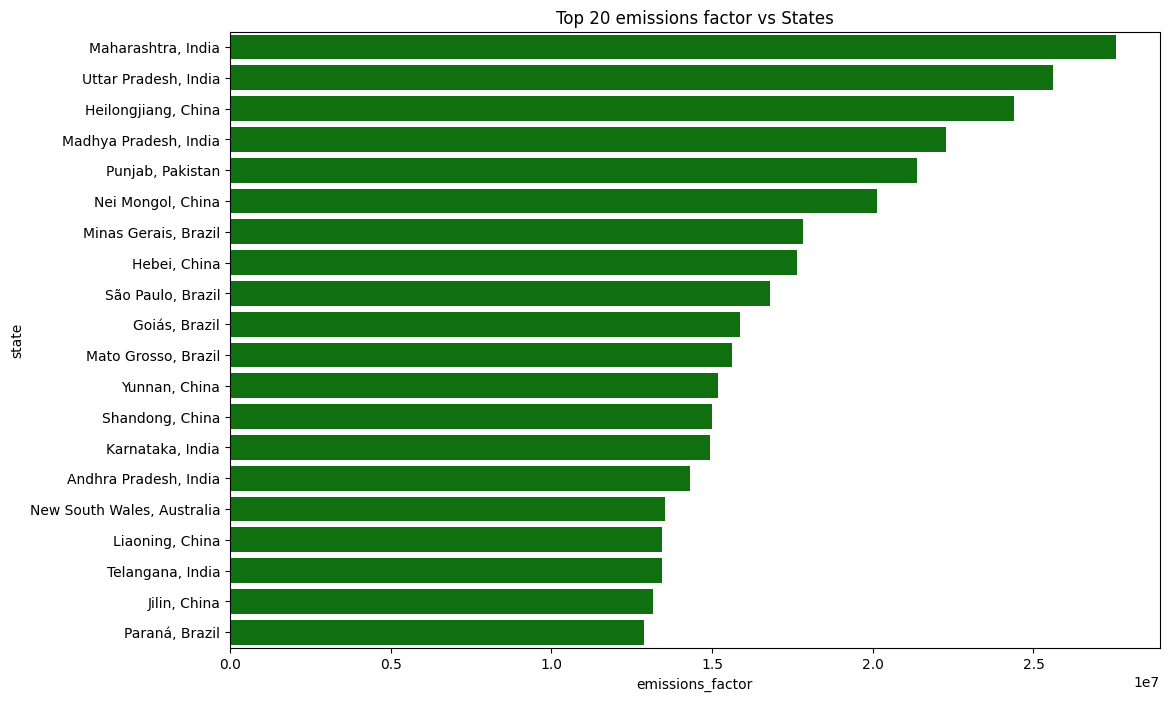

In [37]:
# plot 8
def plot_top_emitting_factor_assets():
    top_assets = cropland_fires.groupby('state')['emissions_factor'].sum().nlargest(20).reset_index()
    plt.figure(figsize=(12, 8))
    sns.barplot(x='emissions_factor', y='state', data=top_assets, color='green')
    plt.title('Top 20 emissions factor vs States')
    plt.show()
plot_top_emitting_factor_assets()

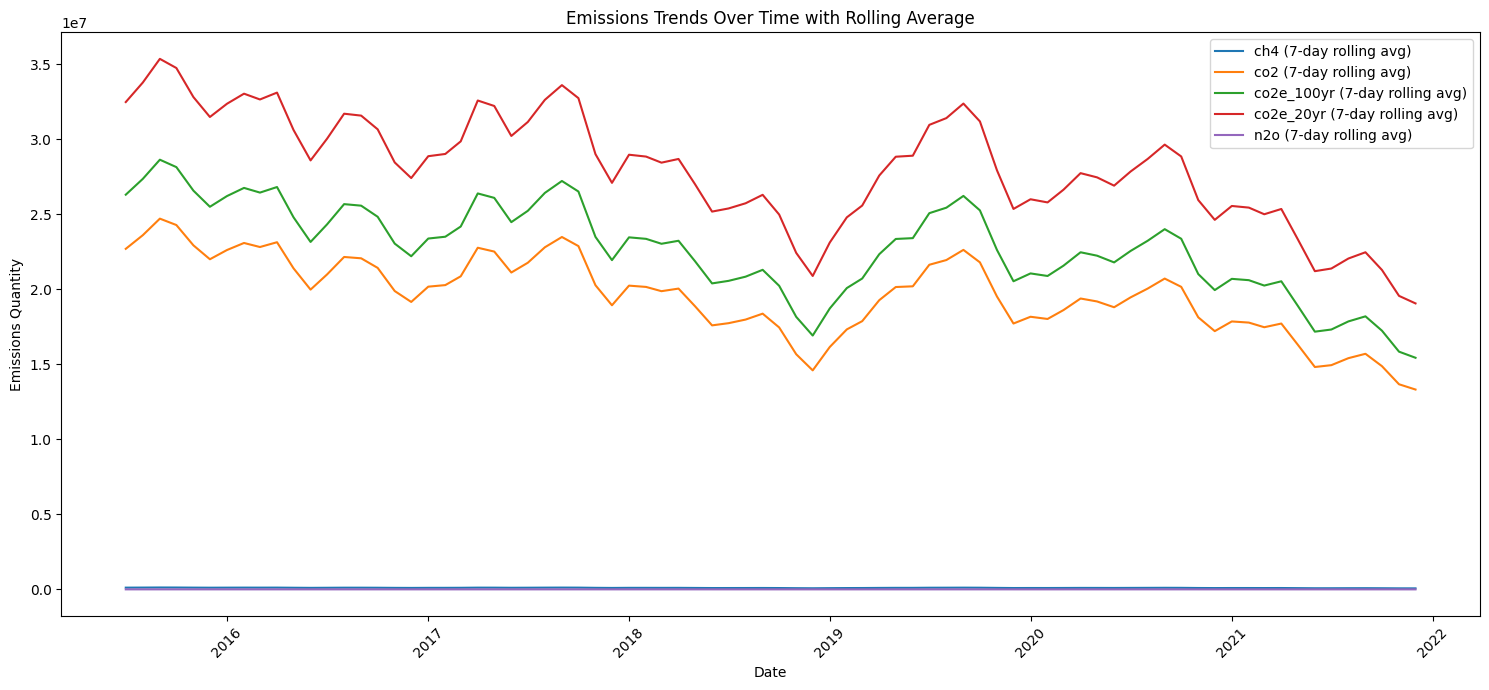

In [38]:
# plot 9
def plot_emissions_time_trend(data: pd.DataFrame) -> None:
    """
    Shows emissions trends over time with rolling average
    """
    # Convert start_time to datetime if not already
    data['start_time'] = pd.to_datetime(data['start_time'])
    
    # Group by date and gas type
    daily_emissions = data.groupby(['start_time', 'gas'])['emissions_quantity'].sum().reset_index()
    
    plt.figure(figsize=(15, 7))
    for gas_type in daily_emissions['gas'].unique():
        gas_data = daily_emissions[daily_emissions['gas'] == gas_type]
        plt.plot(gas_data['start_time'], 
                gas_data['emissions_quantity'].rolling(window=7).mean(),
                label=f'{gas_type} (7-day rolling avg)')
    
    plt.title('Emissions Trends Over Time with Rolling Average')
    plt.xlabel('Date')
    plt.ylabel('Emissions Quantity')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_emissions_time_trend(cropland_fires)

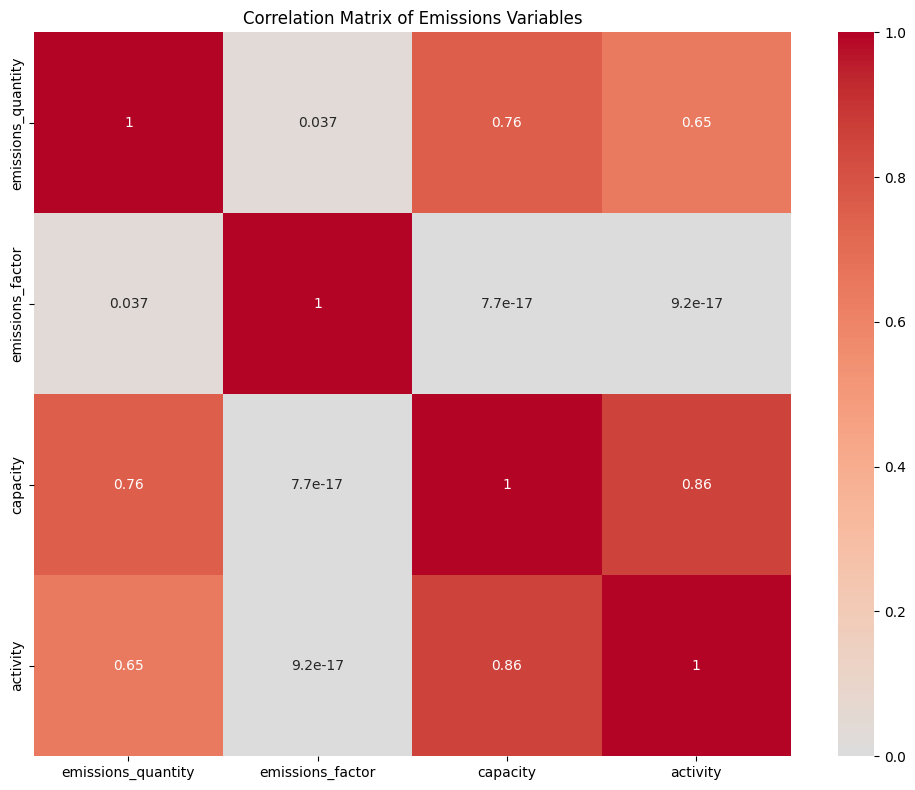

In [39]:
# plot 11
def plot_emissions_correlation_matrix(data: pd.DataFrame) -> None:
    """
    Creates a correlation matrix heatmap for numerical variables
    """
    numerical_cols = ['emissions_quantity', 'emissions_factor', 'capacity', 'activity']
    correlation_matrix = data[numerical_cols].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Emissions Variables')
    plt.tight_layout()
    plt.show()
plot_emissions_correlation_matrix(cropland_fires)

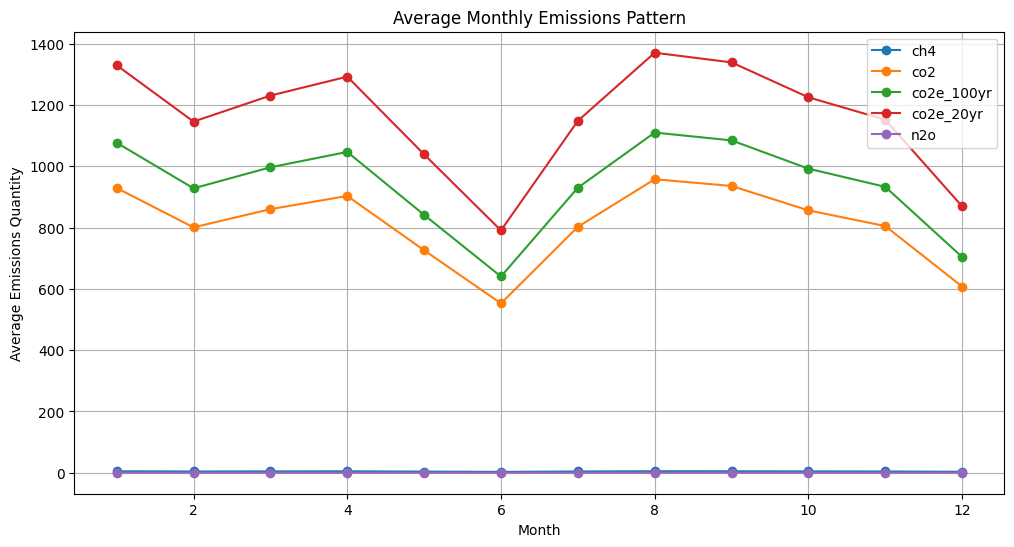

In [40]:
# plot 12
def plot_seasonal_emissions_pattern(data: pd.DataFrame) -> None:
    """
    Shows seasonal patterns in emissions
    """
    # Extract month from start_time
    data['month'] = pd.to_datetime(data['start_time']).dt.month
    
    monthly_emissions = data.groupby(['month', 'gas'])['emissions_quantity'].mean().reset_index()
    
    plt.figure(figsize=(12, 6))
    for gas_type in monthly_emissions['gas'].unique():
        gas_data = monthly_emissions[monthly_emissions['gas'] == gas_type]
        plt.plot(gas_data['month'], gas_data['emissions_quantity'], 
                marker='o', label=gas_type)
    
    plt.title('Average Monthly Emissions Pattern')
    plt.xlabel('Month')
    plt.ylabel('Average Emissions Quantity')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_seasonal_emissions_pattern(cropland_fires)

In [41]:
# plot 13
def plot_geographical_distribution():
    country_emissions = cropland_fires.groupby('iso3_country')['emissions_quantity'].sum().reset_index()

    fig = px.choropleth(country_emissions, locations='iso3_country', 
                        locationmode='ISO-3', color='emissions_quantity',
                        title='Geographical Distribution of Emissions')
    # fig.update_geos(projection_type="orthographic")
    fig.show()

plot_geographical_distribution()


In [41]:
cropland_fires

,asset_id,iso3_country,start_time,end_time,gas,emissions_quantity,emissions_factor,capacity,activity,asset_name,st_astext,country,state,gas_ch4,gas_co2,gas_co2e_100yr,gas_co2e_20yr,gas_n2o,month,year
0,1833543950,USA,2015-10-01,2015-10-31 00:00:00,co2,1267.877783,1440.0,74.48,10.0,United States_Arkansas_,"POLYGON((-91.625 35.625,-91.625 35.875,-91.375...",United States,Arkansas,False,True,False,False,False,10,2015
1,1833543950,USA,2015-10-01,2015-10-31 00:00:00,ch4,6.470336,5.7,74.48,10.0,United States_Arkansas_,"POLYGON((-91.625 35.625,-91.625 35.875,-91.375...",United States,Arkansas,True,False,False,False,False,10,2015
2,1833543950,USA,2015-10-01,2015-10-31 00:00:00,n2o,0.077028,0.1,74.48,10.0,United States_Arkansas_,"POLYGON((-91.625 35.625,-91.625 35.875,-91.375...",United States,Arkansas,False,False,False,False,True,10,2015
3,1833543950,USA,2015-10-01,2015-10-31 00:00:00,co2e_100yr,1469.428755,0.1,74.48,10.0,United States_Arkansas_,"POLYGON((-91.625 35.625,-91.625 35.875,-91.375...",United States,Arkansas,False,False,True,False,False,10,2015
4,1833543950,USA,2015-10-01,2015-10-31 00:00:00,co2e_20yr,1814.297675,0.1,74.48,10.0,United States_Arkansas_,"POLYGON((-91.625 35.625,-91.625 35.875,-91.375...",United States,Arkansas,False,False,False,True,False,10,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999490,1835385426,AGO,2021-05-01,2021-05-31 00:00:00,co2,137.376124,1440.0,8.07,1.0,Angola_Lunda Sul_,"POLYGON((21.875 -10.625,21.875 -10.375,22.125 ...",Angola,Lunda Sul,False,True,False,False,False,5,2021
9999491,1835385426,AGO,2021-05-01,2021-05-31 00:00:00,ch4,0.701069,5.7,8.07,1.0,Angola_Lunda Sul_,"POLYGON((21.875 -10.625,21.875 -10.375,22.125 ...",Angola,Lunda Sul,True,False,False,False,False,5,2021
9999492,1835385426,AGO,2021-05-01,2021-05-31 00:00:00,n2o,0.008346,0.1,8.07,1.0,Angola_Lunda Sul_,"POLYGON((21.875 -10.625,21.875 -10.375,22.125 ...",Angola,Lunda Sul,False,False,False,False,True,5,2021
9999493,1835385426,AGO,2021-05-01,2021-05-31 00:00:00,co2e_100yr,159.214421,0.1,8.07,1.0,Angola_Lunda Sul_,"POLYGON((21.875 -10.625,21.875 -10.375,22.125 ...",Angola,Lunda Sul,False,False,True,False,False,5,2021


In [42]:
# cropland_fires.to_csv("./cropland_fires.csv")